# Partie 3 : Approximation de données par les moindres carrés
### But : effectuer des approximations polynômiales et quelconques d'un nuage de points

In [1]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np

import scipy as sci
import sympy as sym
from scipy.optimize import least_squares
from sympy import *
import math
import random

# Initialisation des variables globales
x = Symbol('x')
y = Symbol('y')

## 1. Générer un nuage de points

In [2]:
#Fonction qui crée un nuage de point
def nuage_point(nb_pts, a, b, c, d):
    incertitude = input("Entrer incertitude\n")
    precision = incertitude[::-1].find('.')
    if (precision == - 1):
        precision = 0
    incertitude = float(incertitude)

    #Création aléatoire d'entiers naturels triés pour les abcisses en respectant :
    # a <= Xi <= b
    l_xi = random.sample(range(a,b), nb_pts)
    l_xi.sort()

    # Création aléatoire de réels quelconques pour les ordonnées en respectant les conditions :
    # Pour tout i, |Yi+1 - Yi| < Ɛ 
    # c <= Yi <= d
    l_yi = []
    yo = round(random.uniform(c,d),precision)
    l_yi.append(yo)

    for i in range(1, nb_pts, 1):
        prev_y = l_yi[i - 1]
        yi = round(random.uniform(c,d), precision)
        if (abs(yi - prev_y) > incertitude):
            while(abs(yi - prev_y) > incertitude):
                yi = round(random.uniform(c,d), precision)
        l_yi.append(yi)

    return l_xi, l_yi

In [3]:
#Fonction qui trace les points
def tracerPoint(cooX, cooY):
  plt.scatter(cooX, cooY, color="black", marker="x")
  plt.axhline(0, color = "black")
  plt.axvline(0, color = "black")
  plt.grid()
  plt.show()

Entrer incertitude
1
X [3, 4, 5, 6, 8]
Y [30.0, 31.0, 32.0, 31.0, 32.0]


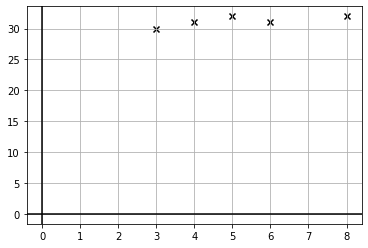

In [4]:
X, Y = nuage_point(5, 0, 10, 2, 40)
print("X", X)
print("Y", Y)
tracerPoint(X, Y)

Entrer incertitude
0.5
X [0, 5, 6, 10, 11, 13, 14, 15, 18, 19, 21, 22, 23, 28, 29, 30, 34, 38, 39, 40, 41, 42, 44, 45, 47, 49, 51, 52, 53, 55, 58, 59, 60, 63, 64, 65, 66, 70, 71, 74, 75, 78, 83, 84, 86, 89, 91, 92, 97, 98]
Y [14.5, 14.9, 14.8, 14.6, 14.4, 14.1, 14.2, 14.7, 14.3, 14.1, 13.7, 14.1, 13.8, 14.3, 14.0, 14.0, 13.6, 13.5, 13.4, 13.1, 13.6, 13.3, 13.5, 13.4, 13.3, 13.6, 13.3, 12.9, 12.7, 12.6, 12.7, 13.0, 12.8, 12.4, 11.9, 11.7, 11.6, 11.6, 11.9, 12.4, 12.6, 12.5, 12.0, 11.6, 11.9, 11.6, 11.9, 12.3, 11.8, 11.6]


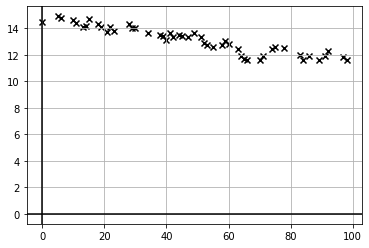

In [ ]:
X, Y = nuage_point(50, 0, 100, 0, 50)
print("X", X)
print("Y", Y)
tracerPoint(X, Y)

Entrer incertitude
0.03
X [0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 23, 24]
Y [2.34, 2.36, 2.34, 2.36, 2.37, 2.38, 2.35, 2.33, 2.32, 2.29, 2.28, 2.26, 2.28, 2.28, 2.25, 2.26, 2.28, 2.27, 2.24, 2.24]


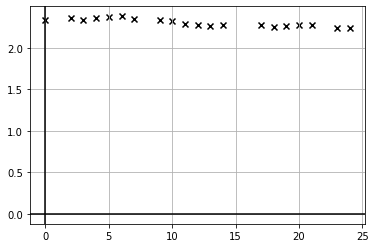

In [ ]:
X, Y = nuage_point(20, 0, 25, 0, 5)
print("X", X)
print("Y", Y)
tracerPoint(X, Y)

## Fonction pour avoir le degré du polynôme
Le degré du polynôme correspond au nombre de variation

In [5]:
def nbVariation(cooX, cooY):

  def coeffDirecteur(x0, x1, y0, y1):
    a = (y1 - y0)/(x1 - x0)
    if a > 0:
      return 1
    elif a < 0:
      return -1
    else:
      return 0

  variation = 1
  coeff = [coeffDirecteur(cooX[i], cooX[i + 1], cooY[i], cooY[i + 1]) for i in range(len(cooX) - 1)]

  for i in range(len(coeff) - 1):
    if (coeff[i] != coeff[i + 1]):
      variation += 1
  return variation

## Polynome d'approximation par la méthode des moindres carrés


In [6]:
def moindreCarre(X, Y):
    variation = nbVariation(X, Y) # Degré du polynôme
    mymodel = np.poly1d(np.polyfit(X, Y, variation))  # param : CooX, CooY, degré du polynôme 
    myline = np.arange(min(X), max(X), 0.1) # 0.1 : Précision sur le lissage de la courbe
    print("model = ", mymodel)
    plt.scatter(X, Y)

    #Tracer le polynôme 
    plt.plot(myline, mymodel(myline))

    plt.show()
    return mymodel

## Application aux exercices 7 et 8


model =   
2.154 x - 1.815


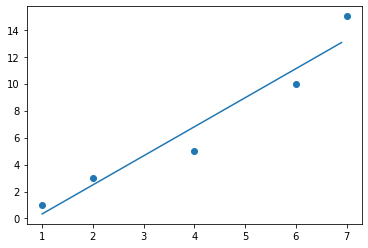

poly1d([ 2.15384615, -1.81538462])

In [7]:
#Exercice 7
X1 = [1, 2, 4, 6, 7]
Y1 = [1, 3, 5, 10, 15]
moindreCarre(X1, Y1)

model =          2
0.8097 x - 4.026 x + 7.037


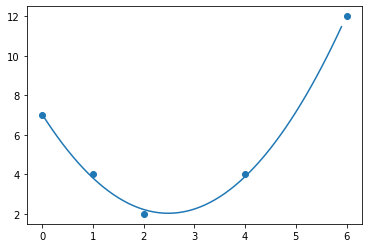

poly1d([ 0.80970149, -4.0261194 ,  7.03731343])

In [8]:
#Exercice 8
X2 = [0, 1, 2, 4, 6]
Y2 = [7, 4, 2, 4, 12]
moindreCarre(X2, Y2)

## Application sur un exemple


model =            3          2
-0.02199 x + 0.5878 x - 3.621 x + 3.775


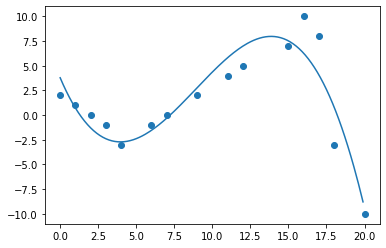

In [9]:
X3 = [0, 1, 2, 3, 4, 6, 7, 9, 11, 12, 15, 16, 17, 18, 20]
Y3 = [2, 1, 0, -1, -3, -1, 0, 2, 4, 5, 7, 10, 8, -3, -10]
modele = moindreCarre(X3, Y3)

In [10]:
def getValeur(X, Y, nb):
  variation = nbVariation(X, Y)
  mymodel = np.poly1d(np.polyfit(X, Y, variation))
  print(mymodel(nb))

In [11]:
getValeur(X3, Y3, 22)
getValeur(X3, Y3, 25)
getValeur(X3, Y3, 50)

-25.51193747047373
-62.9239401194342
-1456.1329644509792
